# Logistic Regression using MultiClass Classification

Multiclass Classification: 

A classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multi-class classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time.

Refer https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

In [41]:
import pandas as pd
from sklearn.datasets import load_digits #This has the dataset for handwritten numbers from 0 to 9

In [42]:
import matplotlib.pyplot as plt

In [43]:
digits = load_digits()

In [44]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

Now let us display the numbers in this dataset.

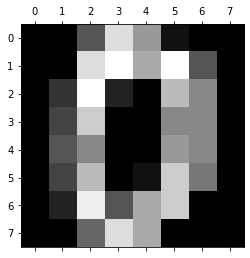

In [45]:
plt.matshow(digits.images[0])

<Figure size 432x288 with 0 Axes>

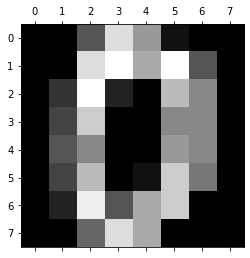

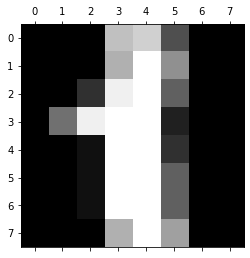

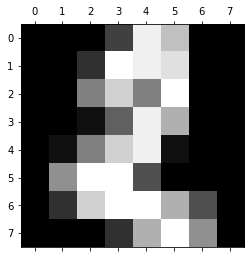

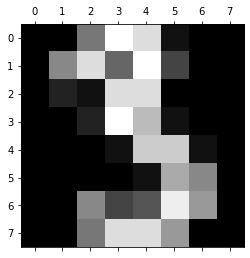

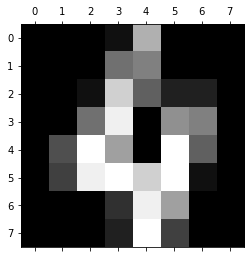

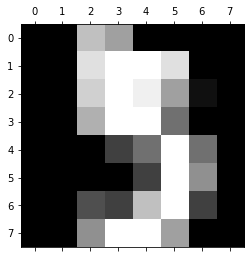

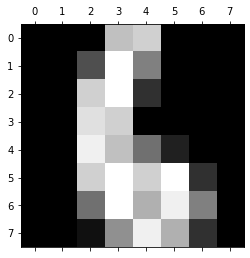

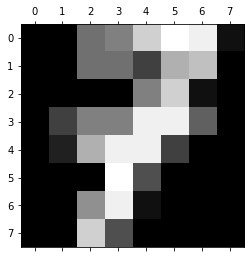

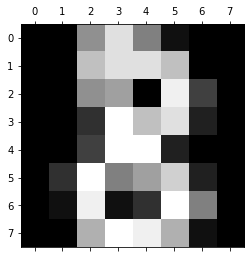

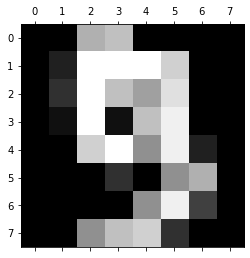

In [46]:
plt.gray() #To show in grayscale
for i in range(10):
    plt.matshow(digits.images[i])

In [47]:
len(digits.data) #There are handwritten data for 1797 types of 0-9. It is in array form.

1797

In [48]:
len(digits.images) #There are images for 1797 images

1797

In [49]:
len(digits.target) #Each image has a target number

1797

# Train data

In [50]:
from sklearn.model_selection import train_test_split
X = digits.data
y = digits.target

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
X_train

array([[ 0.,  0.,  3., ..., 13.,  4.,  0.],
       [ 0.,  0.,  9., ...,  3.,  0.,  0.],
       [ 0.,  0.,  0., ...,  6.,  0.,  0.],
       ...,
       [ 0.,  0.,  9., ..., 16.,  2.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  1.,  0.,  0.]])

In [53]:
X_test

array([[ 0.,  0.,  0., ..., 14.,  5.,  0.],
       [ 0.,  0., 11., ...,  1.,  0.,  0.],
       [ 0.,  0.,  8., ...,  8.,  0.,  0.],
       ...,
       [ 0.,  0.,  7., ..., 10.,  0.,  0.],
       [ 0.,  0.,  7., ..., 16.,  4.,  0.],
       [ 0.,  0., 14., ...,  5.,  0.,  0.]])

In [54]:
len(X_train)

1437

In [55]:
len(X_test)

360

In [56]:
y_train

array([6, 0, 0, ..., 2, 7, 1])

In [57]:
y_test

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

In [58]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [59]:
model.fit(X_train,y_train)

C:\Users\monster\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
model.score(X_test,y_test)

0.9694444444444444

In [61]:
model.predict([digits.data[0]]) #As we already know that this is 0, we are getting 0 only.

array([0])

In [62]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

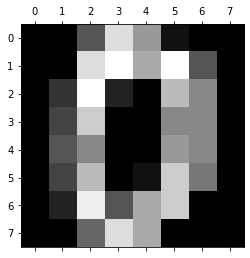

In [63]:
plt.matshow(digits.images[0])

# Let us randomly chose a number from the digits

In [64]:
model.predict([digits.data[1000]])

array([1])

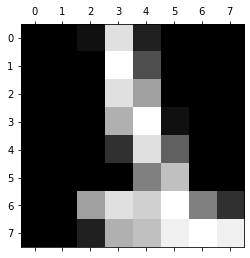

In [65]:
plt.matshow(digits.images[1000])

In [66]:
model.predict([digits.data[300]])

array([7])

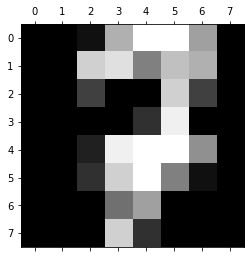

In [67]:
plt.matshow(digits.images[300])

# We can see that above the number predicted matches the predicted value.

Now to see where this model fails we can use confusion matrix.

In [68]:
y_predicted = model.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 33,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 44,  0,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 44,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 34,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 33,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0, 29,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]], dtype=int64)

In [74]:
import seaborn as sns

Text(69.0, 0.5, 'True value')

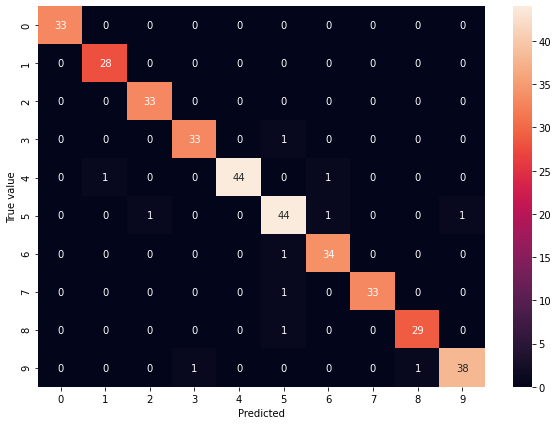

In [80]:
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True value")

The diagonal denotes that more no of times the predicted value and truth value matched which is good. Eg: 5 matched with 5, 44 times.

The black cells shows the no of times a wrong number was predicted. Eg: 6 was predicted to be 5, 1 time.